### Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(R'C:\Users\User1\Downloads\Campaign_data_statistics_section_1.csv')

In [3]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
df.shape

(1888, 22)

In [5]:
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [ ]:
df.info()

#### Encoding the column 'times_of_day'

In [7]:
df['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [8]:
df['times_of_day'] = df['times_of_day'].replace({'Noon':0, 'Morning':1, 'Evening':2})

In [9]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,0,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,0,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,2,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,0,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [ ]:
df.info()

In [ ]:
df.describe()

### EDA

In [ ]:
df.nunique()

#### Univariate Analysis

In [ ]:
# Univariate Analysis

plt.figure(figsize = (20,20))

cols = ['day_of_week', 'is_weekend', 'times_of_day', 'is_image', 'is_personalised', 'is_quote', 'is_emoticons',
       'is_discount', 'is_urgency']
plot_num = 1
for i in cols:
    plt.subplot(5, 2, plot_num)
    sns.countplot(i, data = df)
    plot_num+=1
plt.show()

#### Bivariate Analysis

In [ ]:
plt.figure(figsize = (20,20))

cols = ['day_of_week', 'is_weekend', 'times_of_day', 'is_image', 'is_personalised', 'is_quote', 'is_emoticons',
       'is_discount', 'is_urgency']
plot_num = 1
for i in cols:
    plt.subplot(5, 2, plot_num)
    sns.barplot(x = i, y ='click_rate', data = df, palette = 'bright')
    plot_num+=1
plt.show()

In [ ]:
plt.figure(figsize = (20,20))

cols1 = ['subject_len', 'body_len', 'mean_paragraph_len', 'mean_CTA_len', 'target_audience']
plt_num = 1

for i in cols1:
    plt.subplot(2,3, plt_num)
    sns.lineplot(x = df[i], y = df["click_rate"])
    plt_num+=1
plt.show()   

In [ ]:
sns.relplot(x="subject_len", y="click_rate", ci=None, kind="line", data=df)

#### Correlation between the variables: heatmap

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True)

In [10]:
# Removing redundant column
df1 = df.copy()
df1.drop(columns = ['is_timer', 'campaign_id'], axis = 1, inplace = True)
df1.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,1,0,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,5,1,0,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
3,3,74,11037,30,4,0,2,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,5,1,0,6,26,3,31,0,0,1,0,0,0,0,14,0.142826


In [ ]:
df1.columns

In [ ]:
# checking outliers using boxplot
plt.figure(figsize = (20,40))
plot_num = 1
for i in df1:
    plt.subplot(10,2,plot_num)
    plt.boxplot(df1[i])
    plt.xlabel(i)
    plot_num+=1
plt.show()

### Splitting into input and output variables

In [11]:
x = df1.drop('click_rate', axis = 1)
x.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,76,10439,39,5,1,0,6,26,3,29,0,0,0,0,0,0,0,14
1,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,3,59,12801,16,5,1,0,2,11,3,23,1,0,1,0,0,0,0,16
3,3,74,11037,30,4,0,2,15,9,4,24,0,0,0,0,0,0,0,10
4,3,80,10011,27,5,1,0,6,26,3,31,0,0,1,0,0,0,0,14


In [12]:
y = df1.iloc[:,-1]
y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

#### Feature Selection

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

feature_select = SelectFromModel(RandomForestRegressor()).fit(x,y)
feature_select.get_feature_names_out()

array(['subject_len', 'body_len', 'mean_paragraph_len', 'category',
       'no_of_CTA', 'mean_CTA_len'], dtype=object)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)
feat_imp = pd.Series(model.feature_importances_, index = x.columns)

plt.figure(figsize = (10,5))
feat_imp.nlargest(6).plot(kind = 'barh')

In [14]:
# selecting the important features for model training
x1 = x.filter(['subject_len', 'body_len', 'mean_paragraph_len', 'category',
       'no_of_CTA', 'mean_CTA_len'], axis =1)
x1.head()

,subject_len,body_len,mean_paragraph_len,category,no_of_CTA,mean_CTA_len
0,76,10439,39,6,3,29
1,54,2570,256,2,0,22
2,59,12801,16,2,3,23
3,74,11037,30,15,4,24
4,80,10011,27,6,3,31


In [61]:
x1.category.unique()

array([ 6,  2, 15,  1,  7, 10,  9, 12,  4,  3,  0, 13, 11, 14,  8,  5],
      dtype=int64)

In [ ]:
# Finding outliers amoung the important features
from scipy import stats

cols = x1.columns
z_score = pd.DataFrame()
for i in cols:
    z_score[i] = stats.zscore(x1[i])
    
outliers = z_score.columns[(z_score > 3).any()]
print(outliers)

In [ ]:
x1.nunique()

In [ ]:
#Check distribution of the input variables
plt.figure(figsize = (15,15))
plot_num = 1
for i in x1:
    plt.subplot(3,2,plot_num)
    sns.distplot(x1[i])
    plot_num+=1
plt.show()

#### Training the model

In [15]:
# applying the train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,train_size = 0.90, random_state = 0)

In [16]:
# Checking the shape of all the component
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1699, 6)
(189, 6)
(1699,)
(189,)


In [17]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(x_train)

x_train_sc = scale.transform(x_train)
x_test_sc = scale.transform(x_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()

In [19]:
model1.fit(x_train_sc, y_train)
y_pred = model1.predict(x_test_sc)

In [ ]:
model1.score(x_train_sc, y_train)

In [20]:
model1.score(x_test_sc, y_test)

0.4938472280400569

In [21]:
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators":[10,20,30,40,50,60,100],
    "max_depth":[2,5,6,4,7,9]
}

In [22]:
clf = GridSearchCV(model1, param)
clf.fit(x_train_sc,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 6, 4, 7, 9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 100]})

In [23]:
clf.best_params_

{'max_depth': 9, 'n_estimators': 50}

In [24]:
model2 = RandomForestRegressor(n_estimators=50,max_depth=9)
model2.fit(x_train_sc,y_train)

RandomForestRegressor(max_depth=9, n_estimators=50)

In [25]:
model2.score(x_test_sc, y_test)

0.5153143322927254

In [32]:
# Final predictions
y_pred = model2.predict(x_test_sc)

In [27]:
# evaluation
from sklearn import metrics

In [33]:
# R squared error
score_1 = metrics.r2_score(y_test, y_pred)

In [34]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, y_pred)

In [35]:
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5153143322927254
Mean Absolute Error :  0.027880599916094803


In [ ]:
type(y_pred)

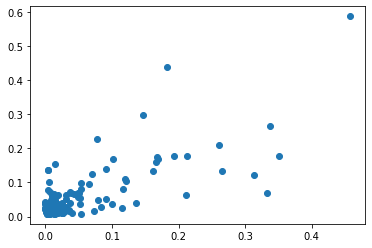

In [53]:
plt.scatter(y_test, y_pred)

In [37]:
import pickle

In [57]:
pickle.dump(model2, open('model.pkl', 'wb'))

In [58]:
model = pickle.load(open('model.pkl', 'rb'))

In [59]:
print(model.predict([[1,100,40,15,3,25]]))

[0.02687765]
